In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
medals_data = pd.read_csv('~/Desktop/Projects/Olympic-ious/data/medals.csv')

In [24]:
medals_data.shape

(21697, 6)

In [4]:
medals_data.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [5]:
summary_data = pd.read_csv('/Users/prithvishah/Desktop/Projects/Olympic-ious/data/Olympics_summary.csv')

In [6]:
summary_data.head()

,country_name,summary
0,United States of America,The United States has a rich Olympic sports hi...
1,Russia,"Russia, formerly part of the Soviet Union, has..."
2,China,China has witnessed remarkable growth in Olymp...
3,Germany,"Germany's Olympic history is impressive, with ..."
4,Great Britain,The United Kingdom boasts a proud Olympic trad...


In [7]:
medals_data.drop(['athlete_url','athlete_full_name','participant_title','country_code'],axis=1,inplace=True)

In [8]:
medals_data.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,country_name,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,SWE


In [9]:
medals_data.drop('country_3_letter_code',axis=1,inplace=True)

In [10]:
medals_data.drop('participant_type',axis=1,inplace=True)

In [11]:
medals_data.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,country_name
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,Italy
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,Italy
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,Norway
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,Norway
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,Sweden


In [31]:
countryWise_grouped_data = medals_data.groupby(['country_name'])

In [32]:
countryWise_grouped_data.first()

,discipline_title,slug_game,event_title,event_gender,medal_type
country_name,,,,,
Afghanistan,Taekwondo,london-2012,58 - 68 kg men,Men,BRONZE
Algeria,Athletics,rio-2016,800m men,Men,SILVER
Argentina,Rugby Sevens,tokyo-2020,Men,Men,BRONZE
Armenia,Boxing,tokyo-2020,Men's Light (57-63kg),Men,BRONZE
Australasia,Tennis,stockholm-1912,singles indoor men,Men,BRONZE
...,...,...,...,...,...
"Virgin Islands, US",Sailing,seoul-1988,Finn - One Person Dinghy (Heavyweight) men,Open,SILVER
West Indies Federation,Athletics,rome-1960,4x400m relay men,Men,BRONZE
Yugoslavia,Rowing,seoul-1988,pair without coxswain 2 men,Men,BRONZE


In [55]:
#Example 
countryWise_grouped_data.get_group('India').shape[0]

35

In [34]:
country_list = []
medal_tally_list = []
def get_country_all_time_medal_tally(country_name):
    country_list.append(country_name)
    country_medal_tally = countryWise_grouped_data.get_group(country_name).shape[0]
    medal_tally_list.append(country_medal_tally)

In [40]:
for country in countryWise_grouped_data.country_name.first():
    get_country_all_time_medal_tally(country)

In [64]:
medal_tally_dataframe = pd.DataFrame(list(zip(country_list,medal_tally_list)),columns=['country','medal_tally'])

In [65]:
country_output = medal_tally_dataframe.sort_values(by=['medal_tally'],ascending=False)

/var/folders/cd/877rxqyx3x91g395x1hxbvnc0000gn/T/ipykernel_1376/4272286403.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.barh(country_output.country[:10],country_output.medal_tally[:10])


<BarContainer object of 10 artists>

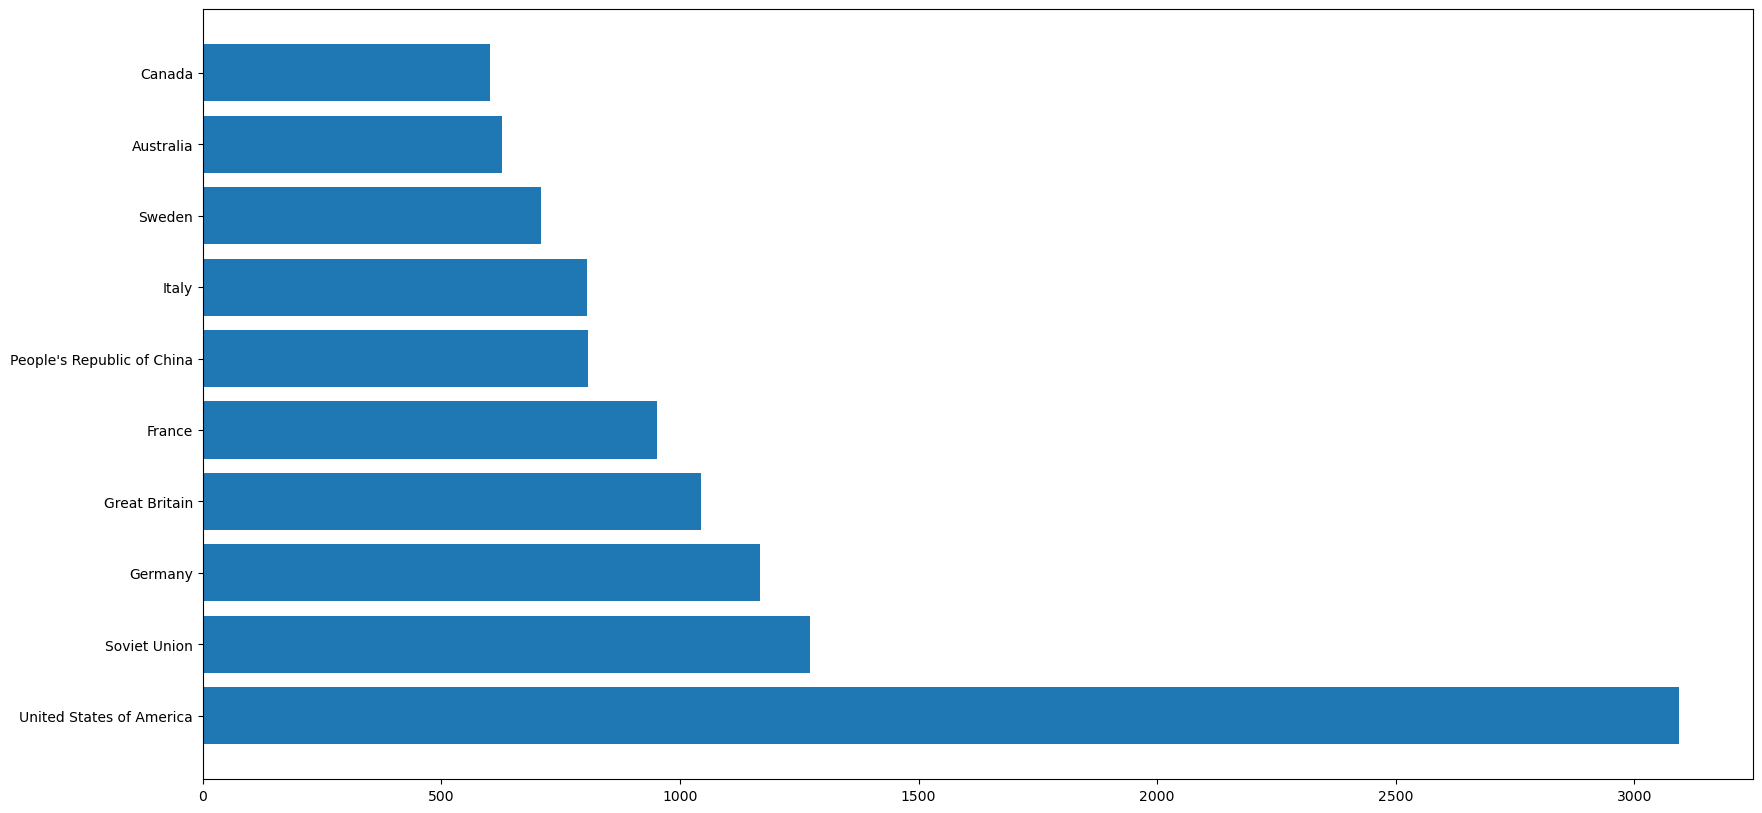

In [73]:
plt.figure(figsize=(20,10))
plt.barh(country_output.country[:10],country_output.medal_tally[:10])